## Data not uploaded thus this training script won't run, the other script named "predictions.ipynb" can be run and verified for the results generated by the model trained in this script.


### 2/2 [==============================] - 2s 648ms/step - loss: 0.2227 - acc: 0.9767
###  Test_Loss   =   22.272349894046783
### Test_Accuracy =   97.67441749572754

### To install juypter notebook
https://towardsdatascience.com/installing-jupyter-notebook-for-different-environments-in-windows-10-97eae0157343

in anaconda prompt with python

conda activate test

conda create -n test python=3.7

conda env list

conda activate test

conda install pip


pip3 install jupyter

### Libraries Needed

In [ ]:
#requirements =['pillow','split-folders','pandas','matplotlib','scikit-learn','opencv-python','tensorflow']


In [ ]:
!pip3 install pillow split-folders pandas matplotlib scikit-learn opencv-python tensorflow

In [1]:
#checking for corroupted files 

import os
from PIL import Image
folder_path = r'newData\rawData'
extensions = ['jpg', 'png', 'bmp', 'gif']
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])


In [10]:
#Deleting corrupt files
'''os.remove('/content/gdrive/MyDrive/FOOD_APP/dataset/biriyani/04d39a92fc.jpg')'''
import os
os.getcwd()



'C:\\Users\\HP\\JD\\6th sem miniproject\\version 2 data increased\\Final_Training'

In [14]:
# Count Files

import os
folder_path = r'newData\rawData'
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    count=0
    for filee in os.listdir(sub_folder_path):
        count=count+1
    print(fldr," ",count)
        

Covid   144
Normal   263


In [13]:
#Spliting to Train Validate Test Folders
import splitfolders
splitfolders.ratio(r"newData\rawData", output=r"newData\split_2", seed=223, ratio=(0.70, 0.20,0.10)) 

Copying files: 407 files [00:01, 348.12 files/s]


In [15]:

#paths
import os
train_dir = r'newdata\split_2\train'
validation_dir = r'newdata\split_2\val'
test_dir =r'newdata\split_2\test'

In [16]:
# Count Train Data Files
folder_path = train_dir
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    count=0
    for filee in os.listdir(sub_folder_path):
        count=count+1
    print(fldr," ",count)

Covid   100
Normal   184


In [17]:
# Count test Data Files
folder_path = test_dir
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    count=0
    for filee in os.listdir(sub_folder_path):
        count=count+1
    print(fldr," ",count)

Covid   16
Normal   27


In [18]:
# Count validation Data Files
folder_path = validation_dir
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    count=0
    for filee in os.listdir(sub_folder_path):
        count=count+1
    print(fldr," ",count)

Covid   28
Normal   52


In [19]:
'''import tensorflow as tf
tf.__version__'''

'import tensorflow as tf\ntf.__version__'

In [20]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
# Generating batches of  images
## Pixel scaling, duplication
train_gen = ImageDataGenerator(rescale=1.0/255,
                               rotation_range=10,
                           
                               
                               zoom_range=0.2,
                               horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1.0/255)
        

In [23]:
train_generator=train_gen.flow_from_directory(
        train_dir,
        target_size=(224,224),
        batch_size=20,
        class_mode = 'binary')

validation_generator = test_gen.flow_from_directory(
        validation_dir,
        target_size=(224,224),
        batch_size=20,
        class_mode = 'binary')

Found 284 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [24]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [32]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 54, 54, 64)       

In [34]:
#giving a random name to the model that will be trained, inorder to identify it with that name during predictions.
#model will be saved under model.h5 file after training
# .h5 extension is a must
model_name = "savedModel.h5"

In [35]:
from tensorflow.keras import optimizers
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['acc'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=4)
checkpoint_cb = ModelCheckpoint( r"model.h5/"+model_name,save_best_only=True)
#If want to save model after each epoch.
#checkpoint_cb = ModelCheckpoint( r"model.h5\CNN_Project_Model-{epoch:02d}.h5",save_best_only=True)

In [37]:


history = model.fit(
      train_generator,
     
      epochs=40,
      validation_data=validation_generator,
      
      callbacks=[checkpoint_cb,early_stop]) 

Epoch 1/40
15/15 [==============================] - 28s 2s/step - loss: 0.6696 - acc: 0.6655 - val_loss: 0.6773 - val_acc: 0.6500
Epoch 2/40
15/15 [==============================] - 28s 2s/step - loss: 0.5990 - acc: 0.7148 - val_loss: 0.6004 - val_acc: 0.6500
Epoch 3/40
15/15 [==============================] - 27s 2s/step - loss: 0.4486 - acc: 0.7852 - val_loss: 0.4456 - val_acc: 0.9375
Epoch 4/40
15/15 [==============================] - 27s 2s/step - loss: 0.3480 - acc: 0.8697 - val_loss: 0.6660 - val_acc: 0.8375
Epoch 5/40
15/15 [==============================] - 27s 2s/step - loss: 0.2716 - acc: 0.8979 - val_loss: 0.5812 - val_acc: 0.7750
Epoch 6/40
15/15 [==============================] - 27s 2s/step - loss: 0.1778 - acc: 0.9331 - val_loss: 0.3817 - val_acc: 0.8750
Epoch 7/40
15/15 [==============================] - 28s 2s/step - loss: 0.2214 - acc: 0.9155 - val_loss: 0.2821 - val_acc: 0.9250
Epoch 8/40
15/15 [==============================] - 28s 2s/step - loss: 0.2185 - acc: 0.91

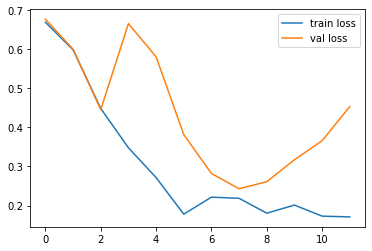

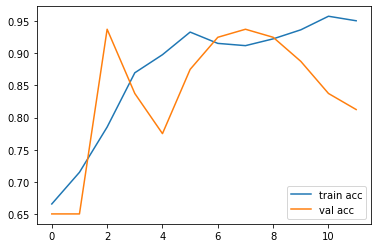

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
test_generator = test_gen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=30,
        class_mode='binary')

Found 43 images belonging to 2 classes.


In [40]:
#accuracy of newly trained model name under model_name variable
from tensorflow.keras.models import load_model
model2=load_model(r'model.h5/'+model_name)
#[Test_Loss Test_accuracy]
a=model2.evaluate(test_generator)
print("  Test_Loss   =  ",a[0]*100)
print("Test_Accuracy =  ",a[1]*100)

2/2 [==============================] - 2s 648ms/step - loss: 0.2227 - acc: 0.9767
  Test_Loss   =   22.272349894046783
Test_Accuracy =   97.67441749572754
